# Visualization (시각화)
> 데이터분석 및 보고에 필요한 시각화 패키지를 알아보고 실제 데이터로 시각화 예제를 다루어봅니다.  
데이터 시각화는 데이터분석 과정에서 단순히 데이터를 살펴보는데 그치지 않고 다양한 분석 가능성을 보여줍니다.  
또한 3자에게 설명을 함에 있어서도 데이터시각화는 굉장히 설득력있는 리포팅을 가능하게 해줍니다.

## seaborn
> - 많은 데이터분석가들이 주로 사용하는 시각화 라이브러리  
> - 다양한 형태의 시각화도구를 제공. 
> - 기본적인 심미성이 뛰어나 특별한 옵션 설정을 하지 않아도 예쁜 그래프 출력이 가능하다.

In [1]:
# 패키지 설치
# !pip install seaborn

# 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화계의 numpy
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 해결
plt.rcParams['font.family'] = 'gulim' # 한글폰트 사용

In [2]:
# 데이터 로딩
df = pd.read_csv('./data/energy1.csv', encoding='cp949')
df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [3]:
df.rename({'전력사용량(kWh)':'전력사용량',
                  '기온(°C)':'기온',
                  '풍속(m/s)':'풍속',
                  '습도(%)':'습도',
                  '강수량(mm)':'강수량',
                  '일조(hr)':'일조'}, 
                  axis=1, inplace=True)

### countplot (막대그래프)
카테고리컬 변수에 적용해서 각 고윳값의 대소비교를 목적으로 사용.

In [6]:
df['비전기냉방설비운영'].value_counts()

1.0    83640
0.0    38760
Name: 비전기냉방설비운영, dtype: int64

<AxesSubplot:xlabel='태양광보유', ylabel='count'>

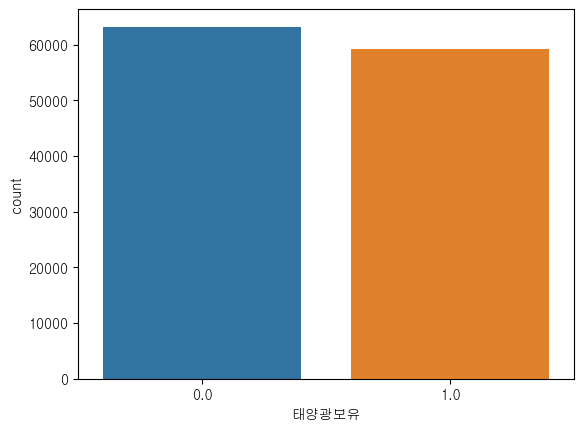

In [9]:
# 쉬운 방법으로 barplot 구현이 가능하다.
sns.countplot(data=df, x='태양광보유')

### histplot (히스토그램)
통계학에서 사용하는 연속형데이터에 대한 분포를 확인하기 위한 툴로 사용합니다.

<AxesSubplot:xlabel='전력사용량', ylabel='Count'>

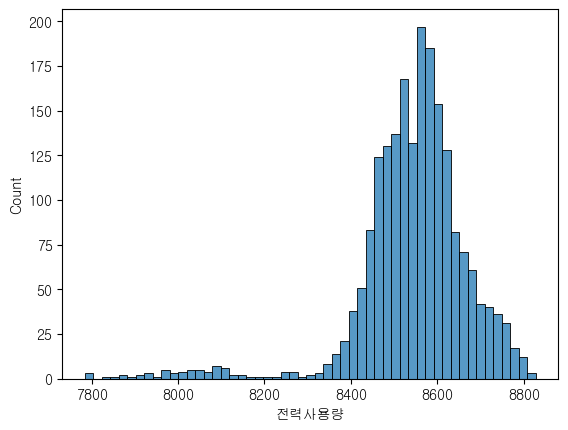

In [16]:
sns.histplot(data=df.loc[df['num'] == 1], x='전력사용량')

### scatterplot (산점도)
관측치를 점으로 표현하는 시각화방법, 각 변수간의 관계를 파악하기 위한 목적으로 사용  
상관관계분석, 유추할 수 있는 정보가 많습니다. 분석툴로 많이 사용하는 시각화 방법입니다.  
x축과 y축에 변수를 위치시키는데 연속형 변수 전달했을 때 산점도가 유의미한 정보를 보여줍니다.

In [23]:
df.head()

,num,date_time,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [26]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [29]:
df['weekday'] = df['date_time'].dt.dayofweek

<AxesSubplot:xlabel='기온', ylabel='전력사용량'>

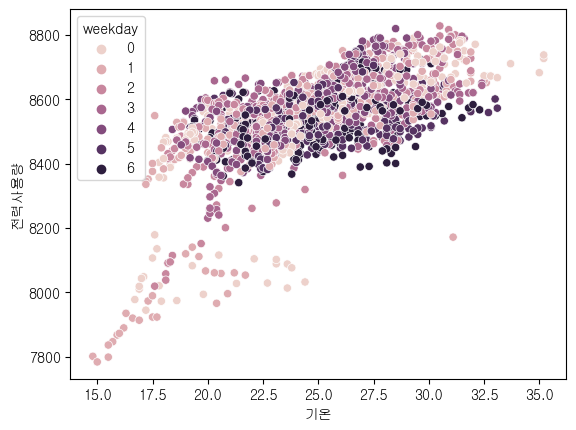

In [42]:
sns.scatterplot(data=df.loc[df['num'] == 1], x='기온', y='전력사용량', hue='weekday')
# 상관관계, 데이터분포, 밀도, 이상치

### boxplot
두 변수 scatterplot과 동일한 방법으로 각 변수를 위치, x 카테고리컬 데이터, y 연속형  
y축에 해당하는 변수의 분포 확인, 이상치 눈에 보이는 형태로 표시

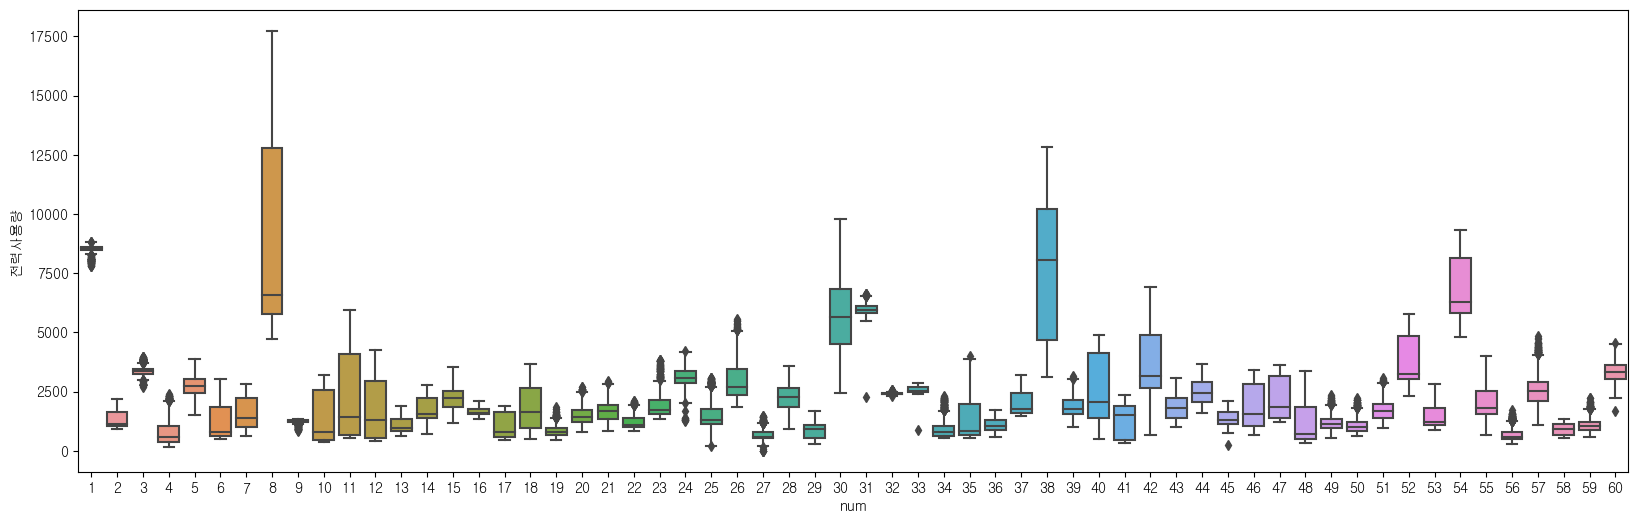

In [41]:
# 굉장히 많이 사용
# 각각의 box하나당 해당 데이터의 사분위수, 중앙값, 최대, 최소값을 표기한다.
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='num', y='전력사용량')
plt.show()
# 네모박스 사분위수 박스 상단 75%, 가운데 직선 중앙값, 박스 하단 25% 
# 박스 외부에 있는 직선 iqr 사분위수 * 1.5
# 검은색 마름모꼴 데이터 <--- 이상치

### pairplot
> 각 변수간 상관관계를 확인하는 scatterplot의 확장버전  
데이터프레임의 모든 변수에 대한 상관관계를 그리드 형태의 scatter로 표현합니다.

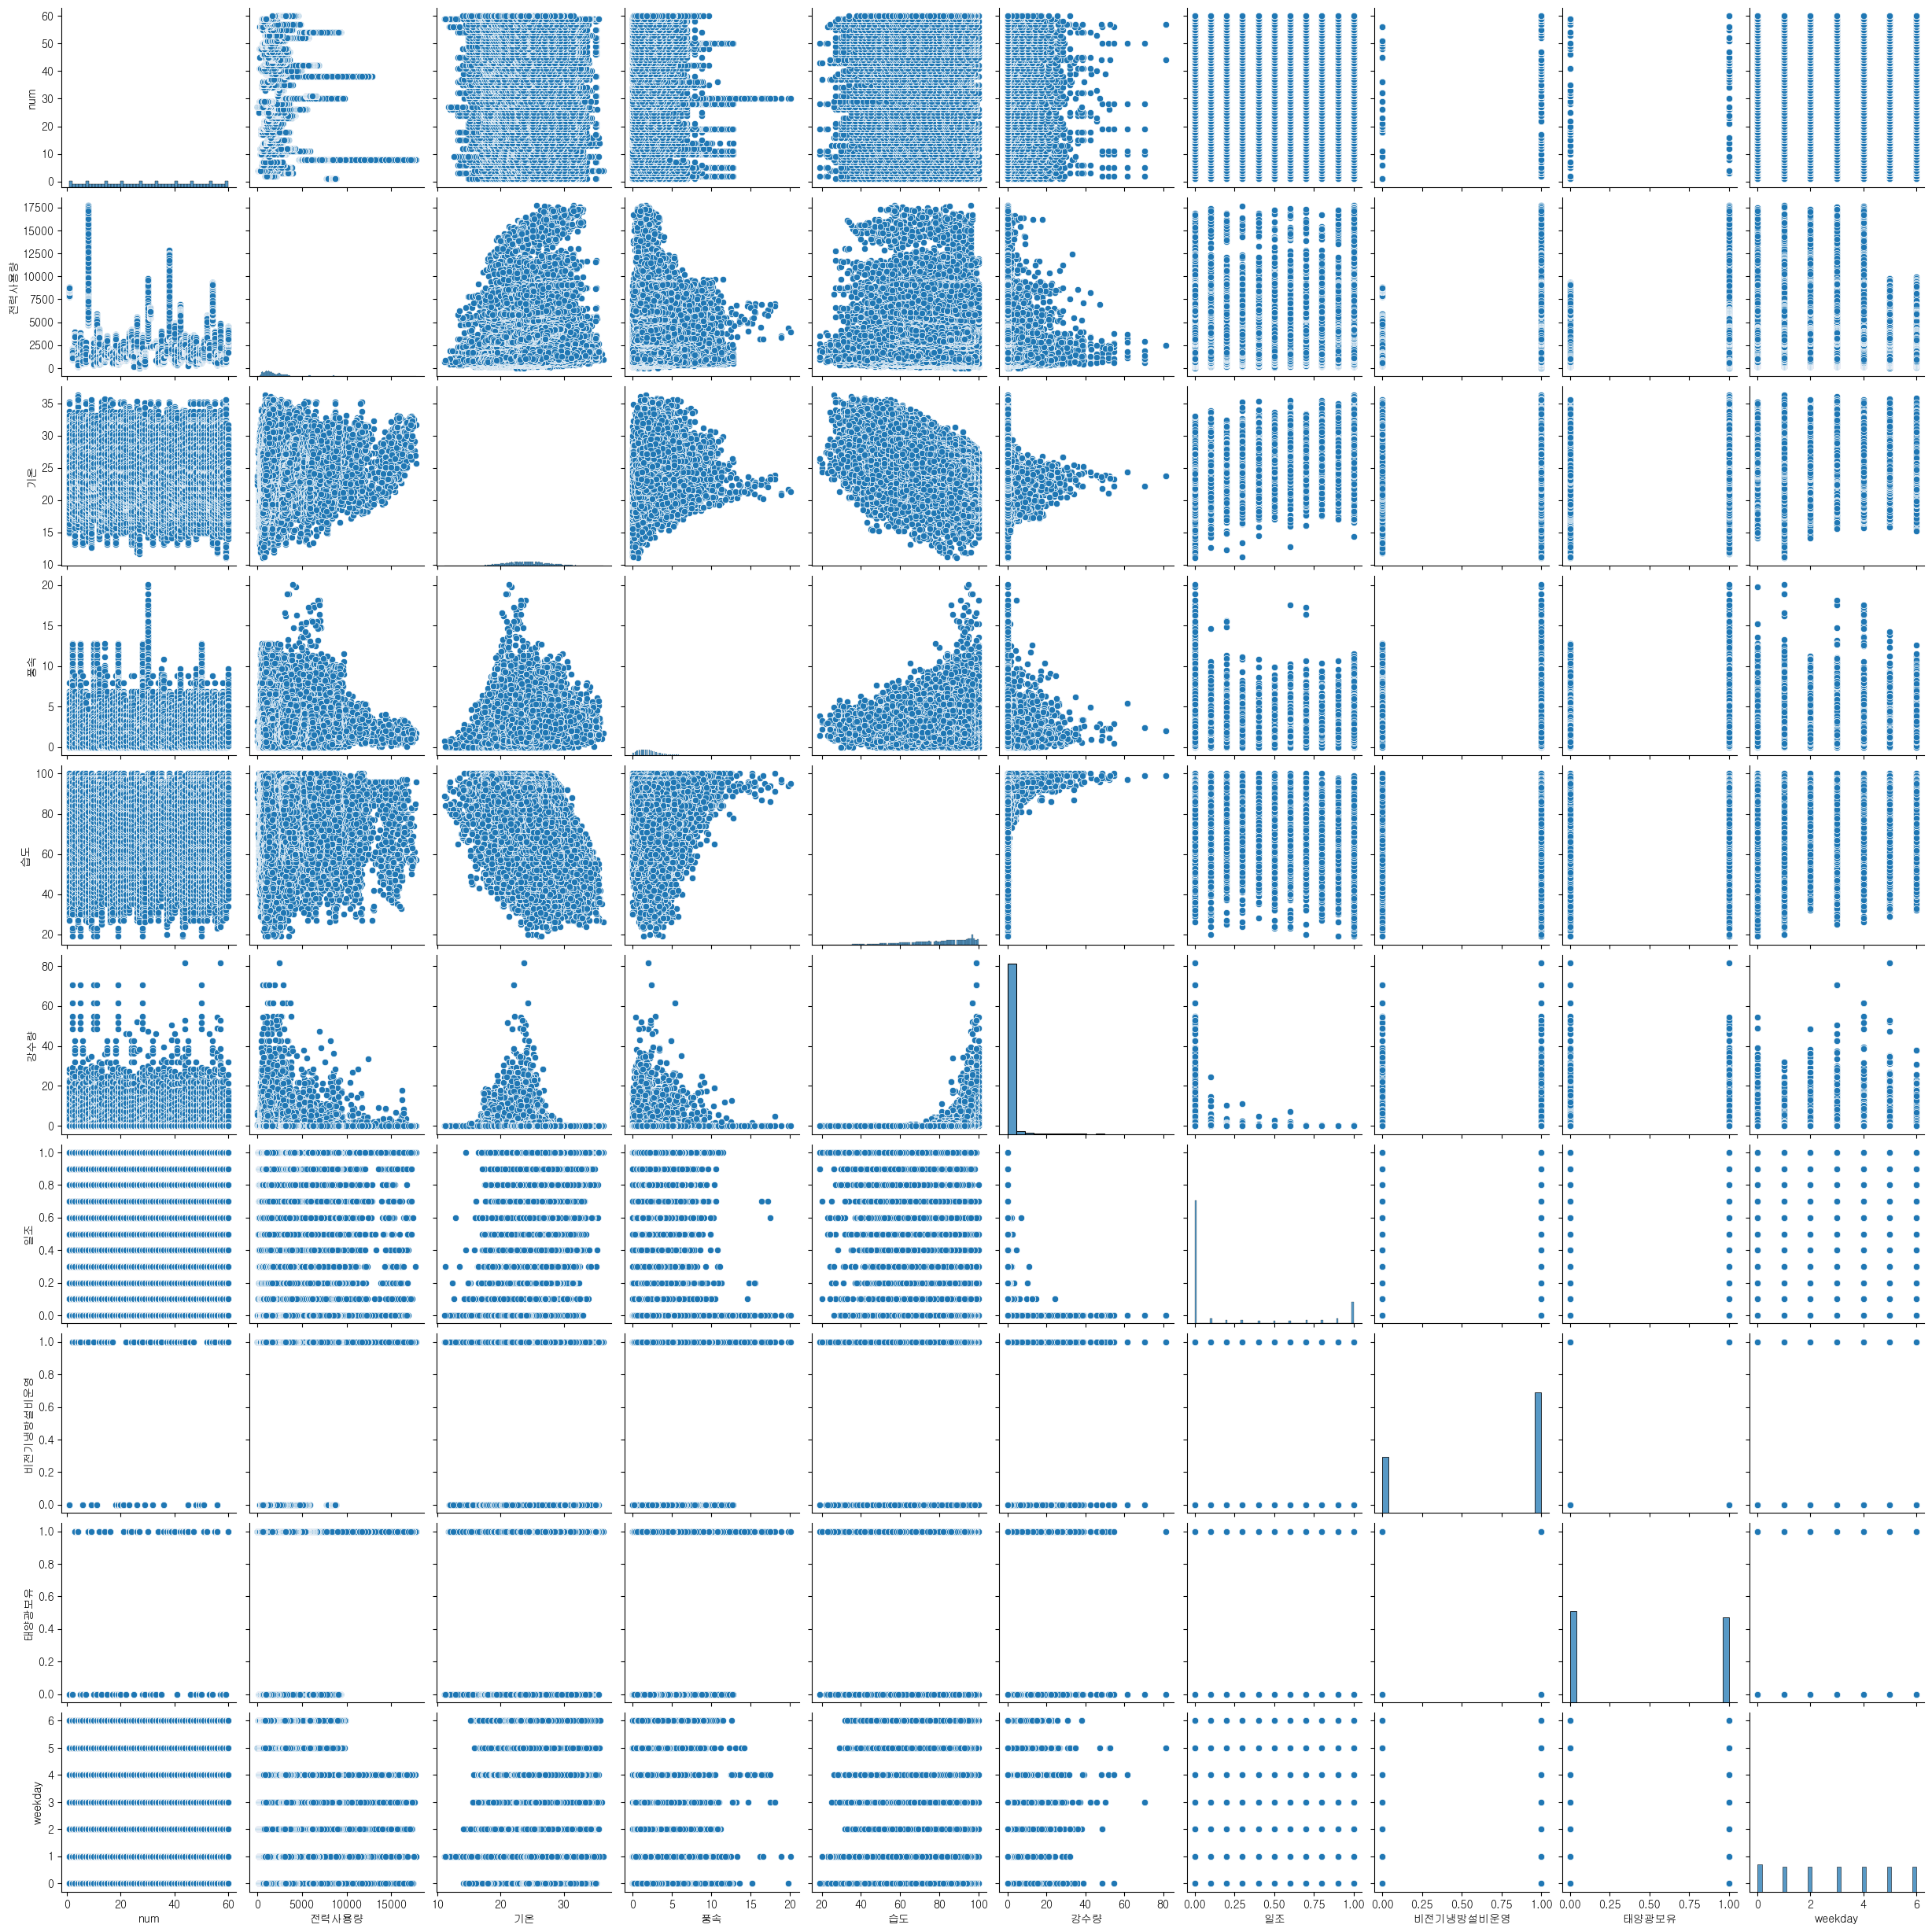

In [43]:
# 각 컬럼간 모든 scatter plot을 그리는 pairplot
sns.pairplot(data=df)

In [44]:
df.corr()

,num,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유,weekday
num,1.000000e+00,-0.063193,0.000363,-0.052184,0.005379,-0.004673,-0.013685,6.103135e-02,9.918068e-02,2.673183e-17
전력사용량,-6.319335e-02,1.000000,0.158361,0.109965,-0.077199,-0.006028,0.112131,1.507991e-01,1.163441e-01,-5.375855e-02
기온,3.631250e-04,0.158361,1.000000,0.167455,-0.509105,-0.093788,0.515657,1.906651e-02,2.586485e-02,3.893405e-02
풍속,-5.218413e-02,0.109965,0.167455,1.000000,-0.110439,0.083433,0.156381,6.274912e-03,-7.655996e-02,-1.574157e-02
습도,5.378530e-03,-0.077199,-0.509105,-0.110439,1.000000,0.208862,-0.627597,-3.140481e-02,-2.065729e-02,1.437564e-02
강수량,-4.673261e-03,-0.006028,-0.093788,0.083433,0.208862,1.000000,-0.112646,-3.559549e-03,-1.668520e-02,-1.688954e-02
일조,-1.368529e-02,0.112131,0.515657,0.156381,-0.627597,-0.112646,1.000000,-5.694932e-03,-8.412045e-03,5.471815e-03
비전기냉방설비운영,6.103135e-02,0.150799,0.019067,0.006275,-0.031405,-0.003560,-0.005695,1.000000e+00,8.484178e-02,-2.211951e-16
태양광보유,9.918068e-02,0.116344,0.025865,-0.076560,-0.020657,-0.016685,-0.008412,8.484178e-02,1.000000e+00,-3.841262e-16
weekday,2.673183e-17,-0.053759,0.038934,-0.015742,0.014376,-0.016890,0.005472,-2.211951e-16,-3.841262e-16,1.000000e+00


### heatmap
> 각 변수간 상관관계를 모두 확인하고자 하는 목적은 pairplot과 같음  
다만 scatterplot 형태가 아닌 상관계수를 계산하여 열지도로 표현  
각 변수간 관계를 한눈에 보기 좋은 형태

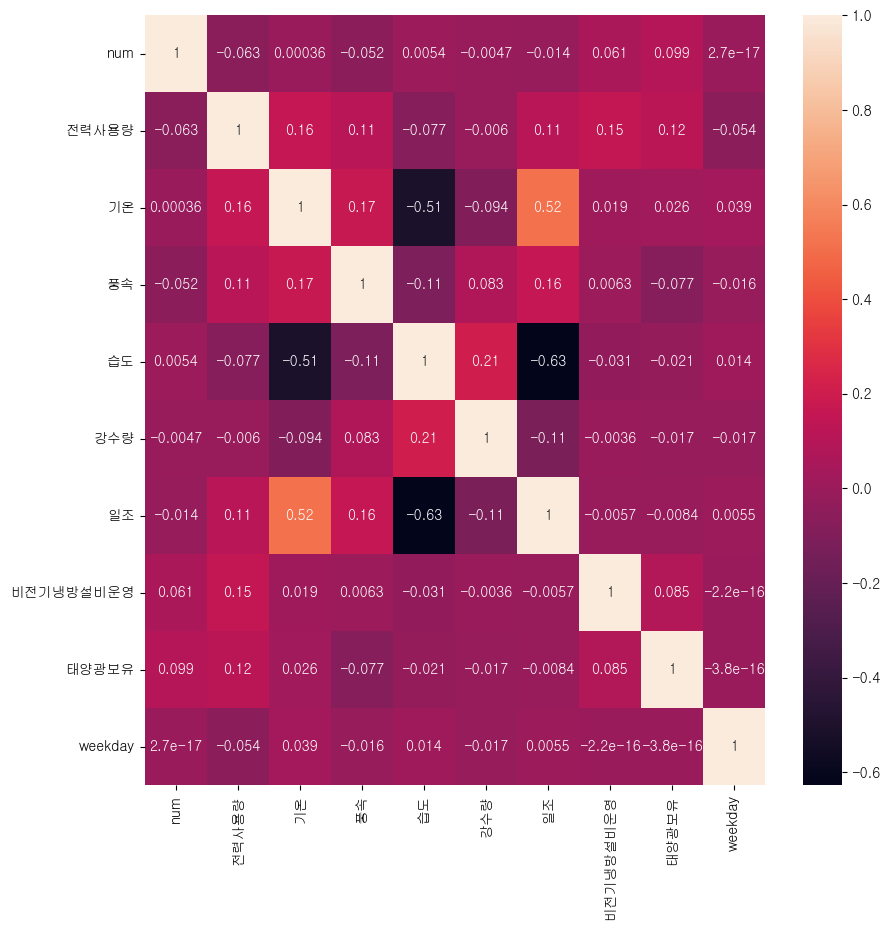

In [52]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True); # 그래프를 정의
# plt.show() # 정의된 그래프를 랜더링

In [49]:
df1 = pd.read_csv('./data/energy2.csv', encoding='cp949')
df1.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

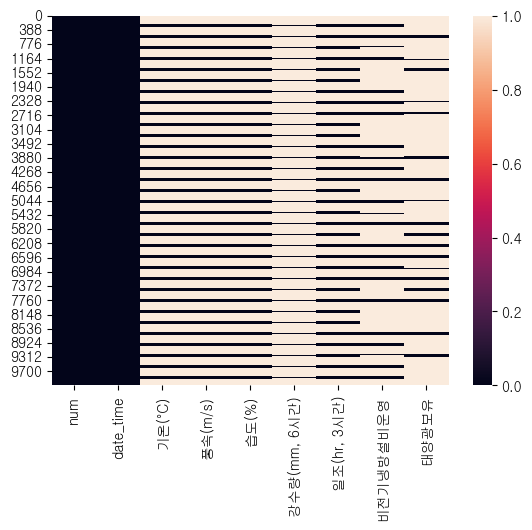

In [54]:
sns.heatmap(data=df1.isna())